**DECISION TREE**

In [ ]:
import numpy as np 
import pandas as pd 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from matplotlib import pyplot as plt
from sklearn import tree

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load dataset
df = pd.read_csv("/content/drive/MyDrive/ML/Grade Prediction Data.csv", encoding='utf8', engine='python')


In [ ]:
df.head()
#df.replace(np.nan,0)

,Daily Study Hour (0 - ),Average CT Marks (0 - 20),Class Attendance (percentage),PL/SPL Study Hours (Daily) (0 - ),PL/SPL Sleeping Hours (Daily Average),Average Sleeping Hours (Daily),Social Media Hours (Daily Average),PL/SPL Social Media Hours (Daily Average),Concentration in Classes (0 - 10),Confidence (0 - 10),Final Grade (last Semester - 3-2) (GPA)
0,1,8,65,12,6,8.0,3,1,NaN,3,3.25
1,2,12,95,9,10,10.0,2,1,7.0,7,3.84
2,2,15,96,13,6,8.0,5,2,5.0,8,3.61
3,1,9,70,6,8,8.0,3,2,7.0,9,3.41
4,1,8,60,10,9,8.0,2,2,3.0,4,3.14


In [ ]:
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 1 to 87
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Daily Study Hour (0 - )                    87 non-null     int64  
 1   Average CT Marks (0 - 20)                  87 non-null     int64  
 2   Class Attendance (percentage)              87 non-null     int64  
 3   PL/SPL Study Hours (Daily) (0 - )          87 non-null     int64  
 4   PL/SPL Sleeping Hours (Daily Average)      87 non-null     int64  
 5   Average Sleeping Hours (Daily)             87 non-null     float64
 6   Social Media Hours (Daily Average)         87 non-null     int64  
 7   PL/SPL Social Media Hours (Daily Average)  87 non-null     int64  
 8   Concentration in Classes (0 - 10)          87 non-null     float64
 9   Confidence (0 - 10)                        87 non-null     int64  
 10  Final Grade (last Semester -

In [ ]:
# feature selection
feature_cols = ['Daily Study Hour (0 - )', 'Average CT Marks (0 - 20)', 'Class Attendance (percentage)', 'PL/SPL Study Hours (Daily) (0 - )',
                'PL/SPL Sleeping Hours (Daily Average)', 'Average Sleeping Hours (Daily)', 'Social Media Hours (Daily Average)',
                'PL/SPL Social Media Hours (Daily Average)','Concentration in Classes (0 - 10)','Confidence (0 - 10)']
X = df[feature_cols].values.tolist()
y = df['Final Grade (last Semester - 3-2) (GPA) '].values.tolist()

In [ ]:
print(X[0:5])
print(y[0:5])

[[2.0, 12.0, 95.0, 9.0, 10.0, 10.0, 2.0, 1.0, 7.0, 7.0], [2.0, 15.0, 96.0, 13.0, 6.0, 8.0, 5.0, 2.0, 5.0, 8.0], [1.0, 9.0, 70.0, 6.0, 8.0, 8.0, 3.0, 2.0, 7.0, 9.0], [1.0, 8.0, 60.0, 10.0, 9.0, 8.0, 2.0, 2.0, 3.0, 4.0], [2.0, 15.0, 80.0, 10.0, 5.0, 7.0, 1.0, 0.0, 7.0, 9.0]]
[3.84, 3.61, 3.41, 3.14, 3.88]


In [ ]:
for i in range(len(y)):
  if y[i]>=3.75:
    y[i]=6
  elif y[i]>= 3.5:
    y[i]=5
  elif y[i]>=3.25:
    y[i]=4
  elif y[i]>=3.0 :
    y[i]=3
  elif y[i]>=2.75 :
    y[i]=2
  elif y[i]>= 2.5:
    y[i]=1
  else:
    y[i]=0

In [ ]:
print(y[0:5])

[6, 5, 4, 3, 6]


In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test

In [ ]:
# Decision tree classifier 
DT = DecisionTreeClassifier(criterion='entropy')

#fitting the training data
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
# prediction on random data
Y_pred=DT.predict(X_train)
print(Y_pred)

# prediction on X_test (testing data )
Y_pred=DT.predict(X_test)
print(Y_pred)

[5 6 5 6 5 4 3 3 6 2 6 6 6 6 6 4 2 6 6 4 4 6 6 6 6 6 3 6 3 6 6 6 6 3 4 3 6
 6 4 4 6 6 6 6 5 4 6 6 6 5 6 6 6 6 6 6 5 5 6 5 4 6 4 3 5 6 4 5 4]
[3 4 2 3 6 2 6 6 6 3 6 5 6 3 4 3 6 6]


In [ ]:
#Accuray of the model 
print("Accuracy:", accuracy_score(y_test, Y_pred))
#confusion matrix
cm=np.array(confusion_matrix(y_test, Y_pred))
cm

Accuracy: 0.5555555555555556


array([[0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 3, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 8]])

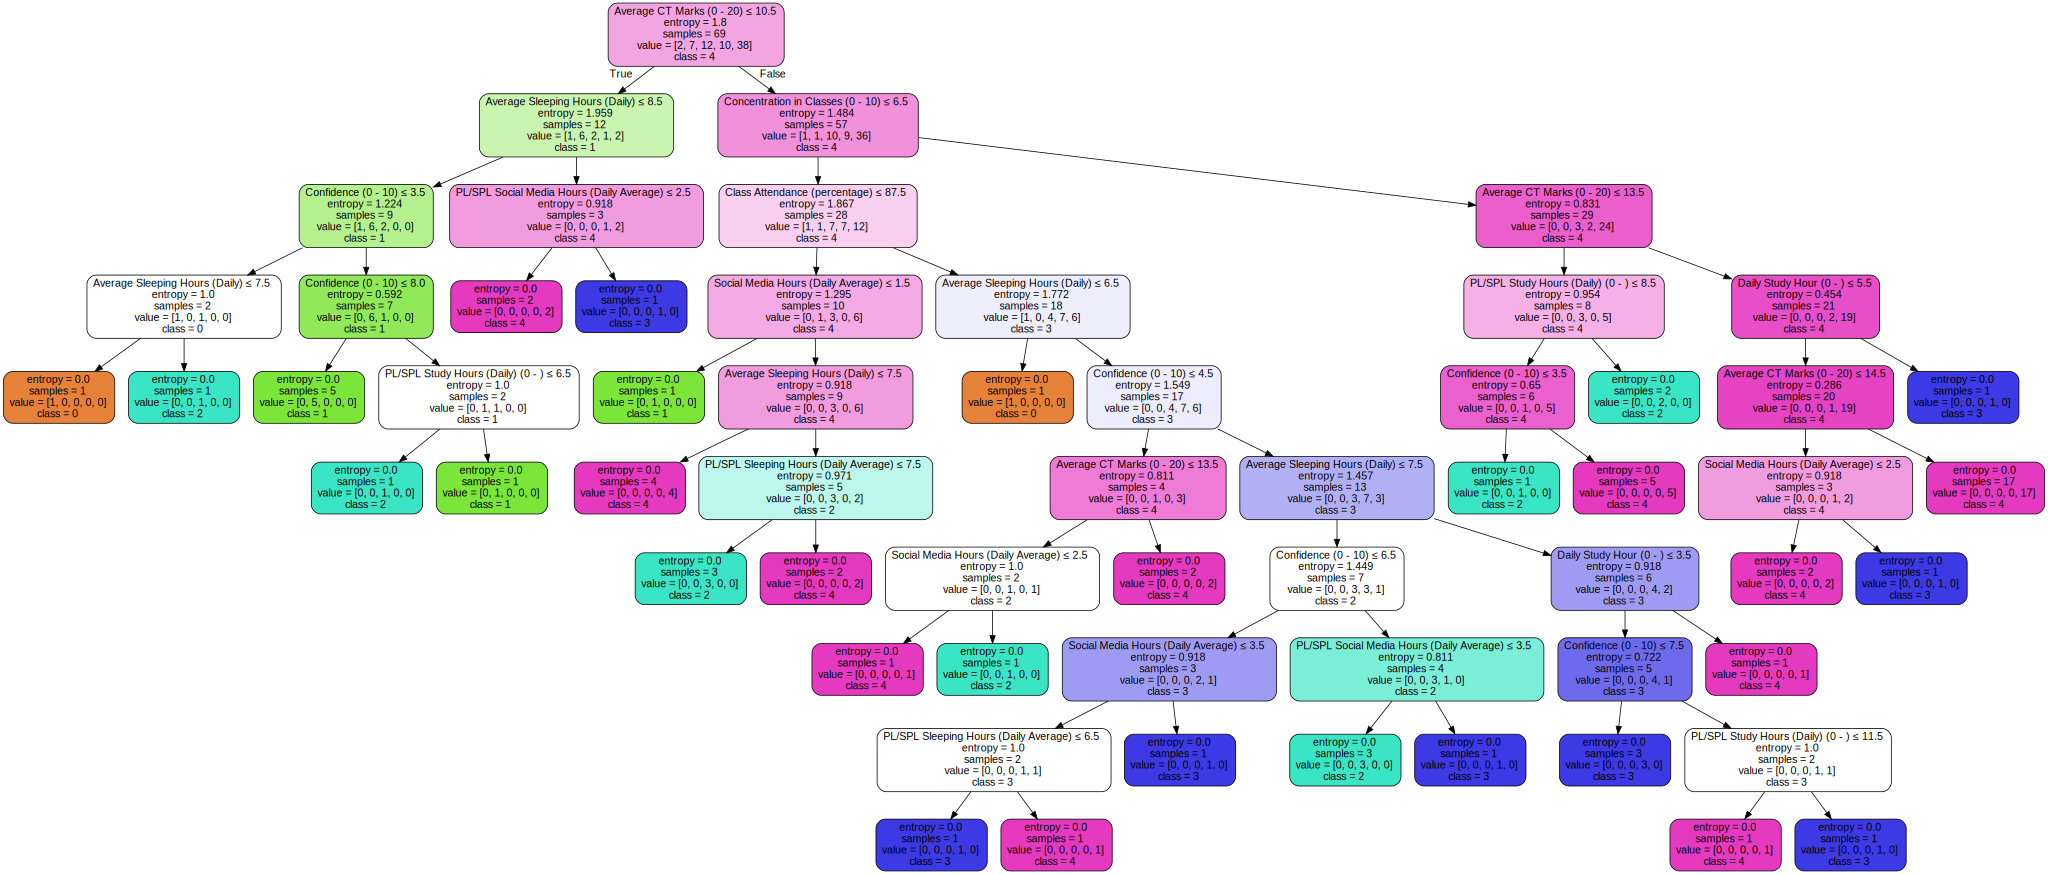

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(DT, out_file=None, 
                      feature_names=feature_cols,  
                      class_names=['0','1','2','3','4','5','6'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix
Y_pred = KNN.predict(X_test)
#Accuray of the model 
print("Accuracy:", accuracy_score(y_test, Y_pred))
print(confusion_matrix(y_test, Y_pred))

Accuracy: 0.5555555555555556
[[0 0 1 0 0 0]
 [0 0 1 0 0 1]
 [0 0 0 0 0 0]
 [0 0 0 1 1 2]
 [0 0 0 0 1 0]
 [0 0 0 1 1 8]]


In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    print(np.mean(pred_i != y_test))

0.5
0.7222222222222222
0.5555555555555556
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.5
0.5
0.5
0.3888888888888889
0.3333333333333333
0.4444444444444444
0.3888888888888889
0.2777777777777778
0.2777777777777778
0.3333333333333333
0.4444444444444444
0.3888888888888889
0.3888888888888889
0.4444444444444444
0.3333333333333333
0.3888888888888889
0.3888888888888889
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.4444444444444444


Text(0, 0.5, 'Mean Error')

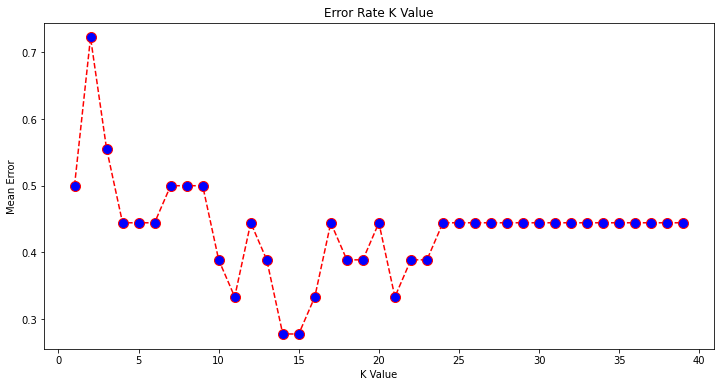

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')